# Lab 10 - Logistic Regression

The Challenger Space Shuttle tragically explored in 1986, killing all astronauts on board.  The explosion was shown to have been caused by an O-ring failure, likely due to cold temperatures the day of the launch (and also poor engineering that allowed this failure to cause such catastrophy).

This lab will use experimental data from tests on whether O-rings failed at different temperatures.  The data set can be downloaded [here](http://comet.lehman.cuny.edu/owen/teaching/mat328/chall.txt)

Some of this lab is based off the Harvard Data Science CS109 Lab 4, Fall 2015.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf


%matplotlib inline

Read the data into a dataframe.

In [3]:
data = pd.read_csv("chall.txt", header=None, sep='\s+', names=['Temperature', 'Failure'])

Create a scatter plot with temperature on the x axis and failure on the y axis.  What do you notice?

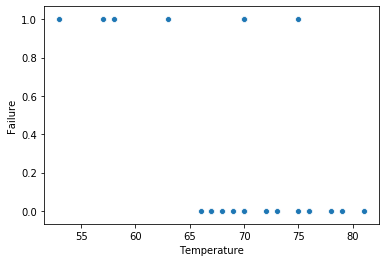

In [5]:
sns.scatterplot(x=data['Temperature'], y=data['Failure'])

We will now use statsmodel to fit a logistic regression model to the data.  Notice that the code is similar to when we fit a linear regression model to the data.

In [6]:
logit_model = smf.logit('Failure ~ Temperature',data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 Oct 2019   Pseudo R-squ.:                  0.2813
Time:                        17:24:13   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041       0.581      29.505
Temperature    -0.2322      0.108     -2.145      0.032      -0.444      -0.020
===============================================================================
"""

Is there an R-squared value in the summary?  What is the formula for the model?

There is another way to get the model parameters:

In [7]:
logit_model.params

Intercept      15.042902
Temperature    -0.232163
dtype: float64

We can use these parameters to graph the model equation on the data.  

First, create 200 evenly spaced x values (look at the data to see what their range should be): 

In [9]:
x = np.linspace(50, 85, 200)

Next, we can compute $\beta_0 + \beta_1 x$ for all of these x values:

In [10]:
p = logit_model.params
reg = p['Intercept'] + x*p['Temperature']
reg

array([ 3.43476444,  3.39393179,  3.35309915,  3.31226651,  3.27143386,
        3.23060122,  3.18976858,  3.14893593,  3.10810329,  3.06727065,
        3.026438  ,  2.98560536,  2.94477272,  2.90394007,  2.86310743,
        2.82227478,  2.78144214,  2.7406095 ,  2.69977685,  2.65894421,
        2.61811157,  2.57727892,  2.53644628,  2.49561364,  2.45478099,
        2.41394835,  2.37311571,  2.33228306,  2.29145042,  2.25061778,
        2.20978513,  2.16895249,  2.12811985,  2.0872872 ,  2.04645456,
        2.00562192,  1.96478927,  1.92395663,  1.88312399,  1.84229134,
        1.8014587 ,  1.76062606,  1.71979341,  1.67896077,  1.63812812,
        1.59729548,  1.55646284,  1.51563019,  1.47479755,  1.43396491,
        1.39313226,  1.35229962,  1.31146698,  1.27063433,  1.22980169,
        1.18896905,  1.1481364 ,  1.10730376,  1.06647112,  1.02563847,
        0.98480583,  0.94397319,  0.90314054,  0.8623079 ,  0.82147526,
        0.78064261,  0.73980997,  0.69897733,  0.65814468,  0.61

Finally we can plug `reg` into the logistic equation to get the y values:

In [11]:
y = np.exp(reg)/(1 + np.exp(reg))
y

array([0.96877352, 0.96751435, 0.96620618, 0.96484724, 0.96343572,
       0.96196975, 0.96044743, 0.95886677, 0.95722576, 0.95552232,
       0.95375432, 0.95191957, 0.95001585, 0.94804087, 0.94599228,
       0.94386771, 0.94166472, 0.93938081, 0.93701348, 0.93456013,
       0.93201815, 0.9293849 , 0.92665767, 0.92383375, 0.92091037,
       0.91788477, 0.91475413, 0.91151565, 0.90816649, 0.90470381,
       0.90112478, 0.89742658, 0.89360639, 0.88966141, 0.88558888,
       0.88138608, 0.87705033, 0.872579  , 0.86796954, 0.86321948,
       0.85832641, 0.85328805, 0.84810222, 0.84276687, 0.83728007,
       0.83164005, 0.82584521, 0.8198941 , 0.8137855 , 0.80751834,
       0.80109182, 0.79450533, 0.78775853, 0.78085132, 0.77378386,
       0.76655663, 0.75917036, 0.75162611, 0.74392524, 0.73606945,
       0.72806076, 0.71990152, 0.71159446, 0.70314261, 0.69454941,
       0.6858186 , 0.6769543 , 0.66796099, 0.65884349, 0.64960697,
       0.64025691, 0.63079916, 0.62123986, 0.61158544, 0.60184

Plot another scatter plot of the data, plus the plot of our calculated x and y values:

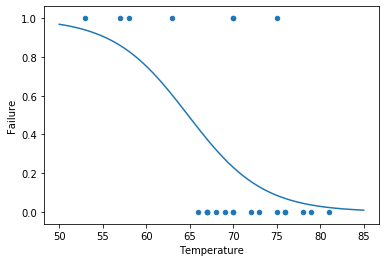

In [20]:
data.plot.scatter(x='Temperature', y='Failure')
plt.plot(x, y)

One way to understand how well our model works is to make a *confusion table* or *confusion matrix*, which counts how many of each type of error there are.  We can create the table using the `pred_table()` function.

In [21]:
logit_model.pred_table()

array([[16.,  0.],
       [ 3.,  4.]])

The confusion matrix can be read as follows:
<code>   
                        predicted
             |    0           |      1      |
             --------------------------------
observed | 0 | true negative  | false positive
         | 1 | false negative | true positive
</code>


How many correct predictions did the model make?   What kind of wrong predictions did the model make?

# Pima (Akimel Oʼodham) Indian Diabetes data

The Akimel O'odham people, who were also known as the Pima Indians since European colonization of the US, currently have a high prevalence of diabetes.   A data set of different possible diabetes indicators and whether the person has diabetes is on [Kaggle](ttps://www.kaggle.com/uciml/pima-indians-diabetes-database) or available [here](http://comet.lehman.cuny.edu/owen/teaching/mat328/diabetes.csv).

Read in the dataset.

Plot a scatter plot of glucose vs. diabetes.

Fit a logistic regression model to this data.

Plot the model equation on top of your scatter plot.

What does the confusion table tell you about the fit of this model?